In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 

In [3]:
df_main = pd.read_csv('Dataset/main.csv')
df_cat = pd.read_csv('Dataset/categories.csv')
df_sim = pd.read_csv('Dataset/similars.csv')
df_rev = pd.read_csv('Dataset/reviews.csv')

In [4]:
df_main.head(5)

,Id,ASIN,Title,Group,Salesrank,NbrOfSimilar,NbrOfCategories,TotalReviews,Downloaded,AvgRating
0,1,0827229534,Patterns of Preaching: A Sermon Sampler,Book,396585,5,2,2,2,5.0
1,2,0738700797,Candlemas: Feast of Flames,Book,168596,5,2,12,12,4.5
2,3,0486287785,World War II Allied Fighter Planes Trading Cards,Book,1270652,0,1,1,1,5.0
3,4,0842328327,Life Application Bible Commentary: 1 and 2 Tim...,Book,631289,5,5,1,1,4.0
4,5,1577943082,Prayers That Avail Much for Business: Executive,Book,455160,5,2,0,0,0.0


In [5]:
df_main.dtypes

Id                   int64
ASIN                object
Title               object
Group               object
Salesrank            int64
NbrOfSimilar         int64
NbrOfCategories      int64
TotalReviews         int64
Downloaded           int64
AvgRating          float64
dtype: object

#### Product Group Info

In [6]:
df_main.groupby("Group")['Id'].count()

Group
Baby Product         1
Book            393561
CE                   4
DVD              19828
Music           103144
Software             5
Sports               1
Toy                  8
Video            26131
Video Games          1
Name: Id, dtype: int64

#### GraphViz of number of similar items of each product

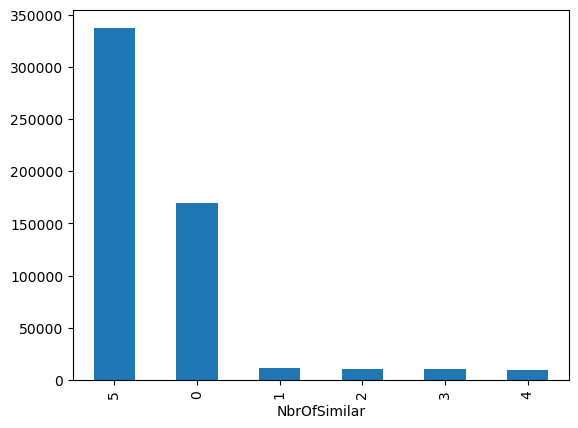

<Figure size 640x480 with 0 Axes>

In [8]:
df_main.NbrOfSimilar.value_counts().plot(kind="bar")
plt.show()
plt.savefig("Viz/SimilarItemsPlot.png")

#### GraphViz of number of Cateogries

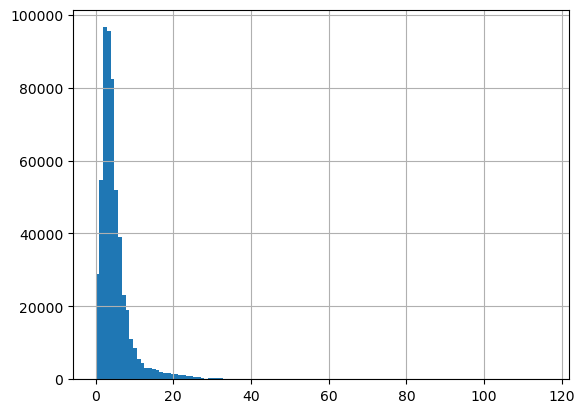

In [9]:
df_main["NbrOfCategories"].hist(bins=120)
plt.show()

In [10]:
df_main.describe()

,Id,Salesrank,NbrOfSimilar,NbrOfCategories,TotalReviews,Downloaded,AvgRating
count,548551.000000,5.485510e+05,548551.000000,548551.000000,548551.000000,548551.000000,542684.000000
mean,274276.000000,4.840907e+05,3.260818,4.575143,14.186448,13.842367,3.209534
std,158353.178095,5.669177e+05,2.300150,4.452269,74.382080,71.537312,1.996296
min,1.000000,-1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,137138.500000,8.573300e+04,0.000000,2.000000,0.000000,0.000000,0.000000
50%,274276.000000,2.942890e+05,5.000000,3.000000,2.000000,2.000000,4.000000
75%,411413.500000,6.659595e+05,5.000000,6.000000,8.000000,7.000000,5.000000
max,548551.000000,3.798351e+06,5.000000,116.000000,5545.000000,4995.000000,5.000000


In [4]:
df_main.Group.unique()

array(['Book', 'Music', 'DVD', 'Video', nan, 'Toy', 'Video Games',
       'Software', 'Baby Product', 'CE', 'Sports'], dtype=object)

In [5]:
data = df_main[df_main.Group.isin(["Book","Music","DVD","Video"])]
data.shape

(542664, 10)

In [6]:
data.to_csv("Dataset/nodes.csv",index=False)

In [7]:
df_sim.head()

,Id,ASIN,Similar
0,1,0827229534,0804215715
1,1,0827229534,156101074X
2,1,0827229534,0687023955
3,1,0827229534,0687074231
4,1,0827229534,082721619X


In [8]:
df_sim.shape

(1958183, 3)

In [9]:
df1 = df_sim.set_index('Similar')
df2 = data.set_index('ASIN')
df3 = df1.join(df2,rsuffix='_2',how='inner') # Id_2 only from data
df3 = df3[df3.Id.isin(data.Id.values)] # Id only from data
df3.head()

,Id,ASIN,Id_2,Title,Group,Salesrank,NbrOfSimilar,NbrOfCategories,TotalReviews,Downloaded,AvgRating
Similar,,,,,,,,,,,
0001515195,185002,0005310075,96102,Go to the Ant,Book,770150,4,0,0,0,0.0
0002154129,275265,0002154463,299097,France the Beautiful Cookbook,Book,76171,5,4,4,4,5.0
0002154129,309702,0002551543,299097,France the Beautiful Cookbook,Book,76171,5,4,4,4,5.0
0002154463,178882,0002550326,275265,Italy : The Beautiful Cookbook (Beautiful Cook...,Book,34654,5,2,3,3,4.0
0002154463,299097,0002154129,275265,Italy : The Beautiful Cookbook (Beautiful Cook...,Book,34654,5,2,3,3,4.0


In [10]:
alinks = df3[['Id','Id_2']].reset_index(drop=True)
#links2 = df3[['Id_2','Id']].reset_index(drop=True)
#links = links1.append(links2)
alinks.drop_duplicates(inplace=True)
alinks.columns = ["source","target"]
alinks.shape

(275230, 2)

In [11]:
alinks.head()

,source,target
0,185002,96102
1,275265,299097
2,309702,299097
3,178882,275265
4,299097,275265


In [12]:
alinks.to_csv('Dataset/links.csv',index=False)

In [14]:
df_cat.head()

,Id,ASIN,L1,L2,L3,L4
0,1,0827229534,Books[283155],Subjects[1000],Religion & Spirituality[22],Christianity[12290]
1,1,0827229534,Books[283155],Subjects[1000],Religion & Spirituality[22],Christianity[12290]
2,2,0738700797,Books[283155],Subjects[1000],Religion & Spirituality[22],Earth-Based Religions[12472]
3,2,0738700797,Books[283155],Subjects[1000],Religion & Spirituality[22],Earth-Based Religions[12472]
4,3,0486287785,Books[283155],Subjects[1000],Home & Garden[48],Crafts & Hobbies[5126]


In [15]:
df_cat.isnull().sum()

Id          0
ASIN        0
L1          0
L2      28770
L3      28788
L4      36702
dtype: int64

In [16]:
df_cat.nunique()

Id      548551
ASIN    548551
L1          16
L2          37
L3         167
L4        1205
dtype: int64

In [17]:
df_cat.L1.unique()


array(['Books[283155]', '[172282]', 'Music[5174]', '[265523]', '[139452]',
       'a', '[540744]', '[468642]', '[229534]', '[229220]', '[171280]',
       '[700060]', '[1055398]', 'Sports & Outdoor[3375251]',
       'Sportsrus.com[3489201]', '[1064952]'], dtype=object)

In [18]:
df_cat[df_cat.L1=='a'].isnull().sum(), df_cat[df_cat.L1=='a'].shape

(Id          0
 ASIN        0
 L1          0
 L2      28770
 L3      28770
 L4      28770
 dtype: int64,
 (28770, 6))

In [22]:
df_cat = df_cat[df_cat.L1!='a']
df_cat.isnull().sum()

Id         0
ASIN       0
L1         0
L2         0
L3        18
L4      7932
dtype: int64